# World's Longest Tunnels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
europe = ["Austria", "Belarus", "Finland", "France/Italy",
        "Germany", "Greece", "Hungary", "Italy", "Norway",
        "Poland", "Portugal", "Russia", "Spain", "Sweden",
        "Switzerland", "Switzerland/France", "Switzerland/Italy",
        "Ukraine", "United Kingdom", "United Kingdom/France"]
na = ["Canada", "United States"]
sa = "Peru"
asia = ["China", "India", "Japan", "Singapore",
        "South Korea", "Taiwan", "Thailand", "Turkey"]
africa = "South Africa"

The longTunnels.csv file contains information about tunnels in use around the world that are at least 13 km long.

In [3]:
tunnels = pd.read_csv("./data/longTunnels.csv", encoding='latin-1')
tunnels.head()

,Name,Location,Region,Length,Type,Year
0,Guangzhou Metro Line 3,Guangzhou,China,60400,Metro,2010
1,Gotthard Base Tunnel,Central Swiss Alps,Switzerland,57104,Railway,2016
2,Beijing Subway Line 10,Beijing,China,57100,Metro,2012
3,Seikan Tunnel,Tsugaru Strait,Japan,53850,Railway,1988
4,Channel Tunnel,English Channel,United Kingdom/France,50450,Railway,1994


The [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn-histplot) function can bin on integer values. Use the BinMethod property name and specify the value as "integers".

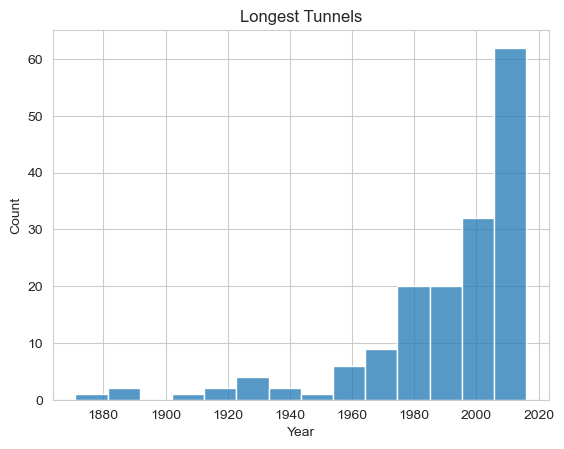

In [4]:
plt.figure()
sns.histplot(tunnels.Year)
plt.title("Longest Tunnels")
plt.show()

Many different types of tunnels are represented in the Type variable of tunnels.

In [5]:
tunnels.Type = pd.Categorical(tunnels.Type)
types = tunnels.Type.cat.categories
types

Index(['Metro', 'Particle Accelerator', 'Railway', 'Road'], dtype='object')

In [6]:
pa = tunnels[tunnels.Type == "Particle Accelerator"]
pa

,Name,Location,Region,Length,Type,Year
46,LEP Tunnel,CERN,Switzerland/France,26659,Particle Accelerator,1989
66,UNK proton accelerator,Protvino (near Moscow),Russia,21000,Particle Accelerator,1994


The Region variable in tunnels contains the country or region in which the tunnel can be found.

In [7]:
tunnels.Region = pd.Categorical(tunnels.Region)

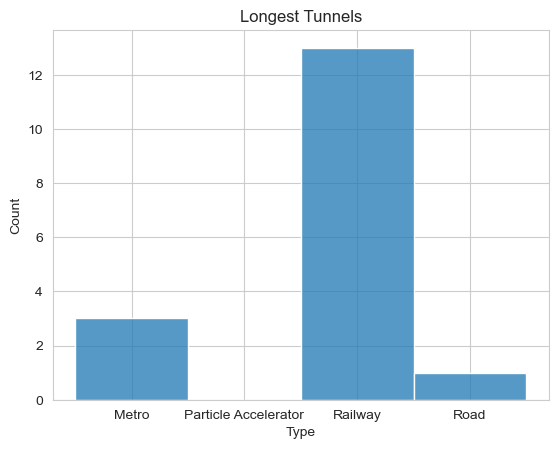

In [8]:
plt.figure()
sns.histplot(tunnels.Type[tunnels.Region=="Japan"])
plt.title("Longest Tunnels")
plt.show()

In [9]:
map_dict = {}
for x in tunnels.Region:
    if x in europe:
        map_dict[x] = "Europe"
    elif x in na:
        map_dict[x] = "North America"
    elif x in sa:
        map_dict[x] = "South America"
    elif x in asia:
        map_dict[x] = "Asia"
    else:
        map_dict[x] = "Africa"

tunnels["Continent"] = tunnels.Region
tunnels["Continent"] = tunnels["Continent"].map(map_dict).astype('category')
tunnels.head()

,Name,Location,Region,Length,Type,Year,Continent
0,Guangzhou Metro Line 3,Guangzhou,China,60400,Metro,2010,Asia
1,Gotthard Base Tunnel,Central Swiss Alps,Switzerland,57104,Railway,2016,Europe
2,Beijing Subway Line 10,Beijing,China,57100,Metro,2012,Asia
3,Seikan Tunnel,Tsugaru Strait,Japan,53850,Railway,1988,Asia
4,Channel Tunnel,English Channel,United Kingdom/France,50450,Railway,1994,Europe


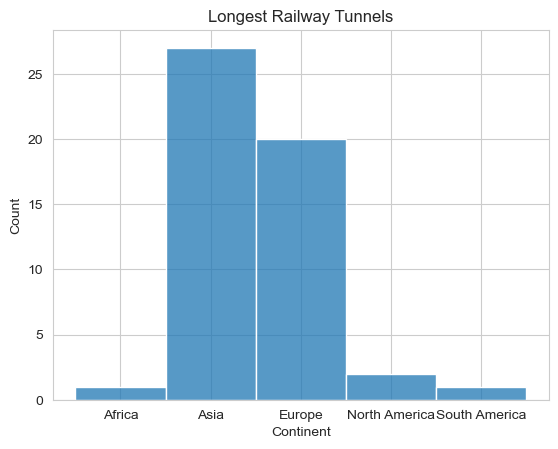

In [10]:
plt.figure()
sns.histplot(tunnels.Continent[tunnels.Type == "Railway"])
plt.title("Longest Railway Tunnels")
plt.show()